# FUNDAMENTOS DE ROBÓTICA MÓVIL 

## TP°2: Módelo dinámico de un multirrotor de un grado de libertad.

### Profesores:
#### Gonzalo Perez Paina
#### David Gaydou
#### Diego Gonzalez Dondo

### Alumnos:
#### Escobar Daniela   72705
#### Ippolitti Rubén      8634 
#### Molins Rodrigo     75569 

## Objetivo

#### Estudiar el comportamiento de lazo cerrado de un sistema multirrotor de un grado de libertad tipo balancı́n utilizando las herramientas de análisis vistas en la materia de control.



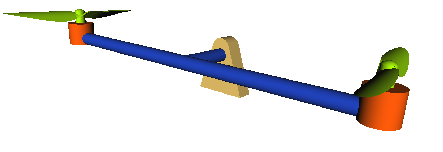

## Descripción de la actividad
#### Este proyecto requiere la construcción del modelo matemático del sistema físico, su análisis en el dominio de Laplace y saber interpretar el resultado obtenido en las gráficas.

## Resolución de actividades:

### 1. Obtener las ecuaciones correspondientes a la cinemática de la rotación.


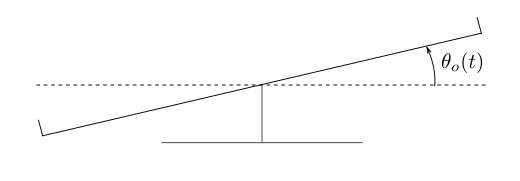

$\;\;$Analizando la figura anterior, vemos que el balancín puede rotar libremente en el eje central, lo que resulta en una posición ángular $\theta$ y una velocidad ángular $\omega$.
   
$\;\;$A su vez, podemos analizar el torque necesario para mover el balancín, el cual depende del momento de inercia. Pero esto ya empieza a entrar en el terreno de la dinámica, por lo que se describirá más adelante.
   
   Esto resulta en:
$$\dot{\theta}=\omega \; \; \; \; \; \; \; \; \; \; (1)\\
j \dot{\omega}=\tau \; \; => \;\;\dot{\omega}=\frac{1}{j}*\tau \; \; \; \; \; \; \; \; \; \; (2)$$
$\;\;$Siendo $j$ el momento de inercia del balancín.

### 2. Obtener las ecuaciones correspondientes a la dinámica de la rotación.

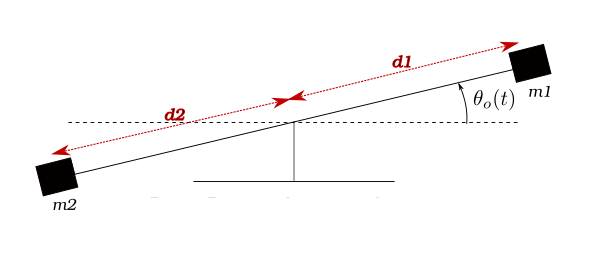

$\;\;$Las ecuaciones dinámicas de rotación del sistema son iguales a las cinemáticas, pero ahora considerando las masas del sistema, por lo que ahora el momento de inercia $j$ resulta en la sumatoria de los momentos de inercia.

$$
\\
j=r_1²*m_1 + r_2²*m_2 \; \; \; \; \; \; \; \; \; \; (3)\\
\\
j=0.25[m²]*0.2[Kg] + 0.25[m²]*0.2[Kg] = 0.1 [Kgm²]\\
$$
$\;\;$Sustituyendo la ecuación (1) en (2) y transformando al dominio de Laplace, se obtiene la ecuación que modela el sistema:

$$
\ddot{\theta}=\frac{1}{0.1}*\tau \;\;=>\;\; \ddot{\theta}=10*\tau\\
L \;\; => \;\; S²\Theta(s) + S*\theta(0) + \dot{\theta}(0) = \frac{1}{j}*\tau(s)\\
\Theta(s)=\frac{10}{S²}*\tau(s)
$$

$\;\;$Y haciendo la relación de la salida sobre la entrada, es decir, el ángulo $\theta$ sobre el torque $\tau$, obtenemos la función de transferencia a lazo abierto:

$$
G_{ol}=\frac{\Theta(s)}{\tau(s)}=\frac{10}{S²}
$$

### 3. Obtener la función de transferencia de lazo cerrado: $G_{cl}(s) = \frac{Θ_o (s)}{Θ_r (s)}$

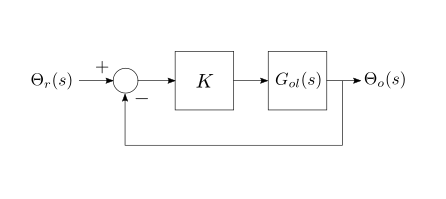

$\;\;$Sabiendo de sistemas de control que el sistema realimentado tiene la forma: $G_{cl}(s)=\frac{G_{ol}(s)}{1+G_{ol}(s)H(s)}$:
$$
G_{cl}(s)=\frac{\frac{10}{S²}}{1+\frac{10}{S²}}\\
G_{cl}(s)=\frac{\frac{10}{S²}}{\frac{S²+10}{S²}}\\
G_{cl}(s)=\frac{10}{S²+10}\;\;\;\;\;\;\;\;\;\;(4)\\
$$

### 4. Calcular las raíces del polinomio característico. Decir qué tipo de respuesta al escalón se espera que tenga el sistema de lazo cerrado.

$\;\;$Al tener los polos ubicados sobre el eje imaginario del plano S, sabemos que el sistema es oscilatorio puro y que la respuesta al escalón debería ser una onda sinusoidal con una amplitud media del valor del escalón de entrada y una frecuencia que dependerá de la ganancia.

$\;\;$Esto es el resultado de aplicarle un torque al balancín y que este trate de corregir su posición utilizando solo un control proporcional. Su interpretación equivalente al dron es que intente estabilizarse y pase de estar inclinado un ángulo $\theta_1$ a estar en $-\theta_1$. Esto es posible porque el dron se encuentra suspendido en el aire y su fricción con el mismo es despreciable.

### 5. Utilizando el paquete de control de python graficar el lugar de raíces del sistema con los valores de K que la función asigne por defecto.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import control
import math

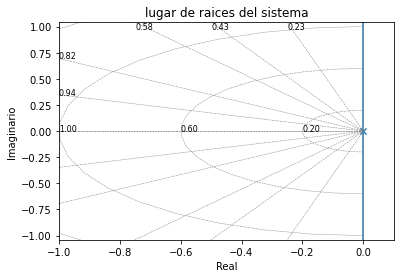

In [2]:
num=np.array([10])
den=np.array([1,0,0])
Fs_ol=control.tf(num,den)
plt.figure()
rlist, klist=control.root_locus(Fs_ol, None, (-1,0.1))
plt.title('lugar de raices del sistema')
plt.ylabel('Imaginario')
plt.show()

   Esto representa el lugar de raices del sistema a lazo abierto. Como puede verse, los polos del sistema existen en el origen (S=0), el cual es el único valor capaz de anular el denominador del sistema.

### 6. Utilizando la función feedback definir el modelo de lazo cerrado y aplicarle la función escalón unitario. Obtener las gráficas para valores de K = 0.1; K = 1; K = 10.

F_cl_01(s)= 
   1
-------
s^2 + 1

F_cl_1(s)= 
   10
--------
s^2 + 10

F_cl_10(s)= 
   100
---------
s^2 + 100



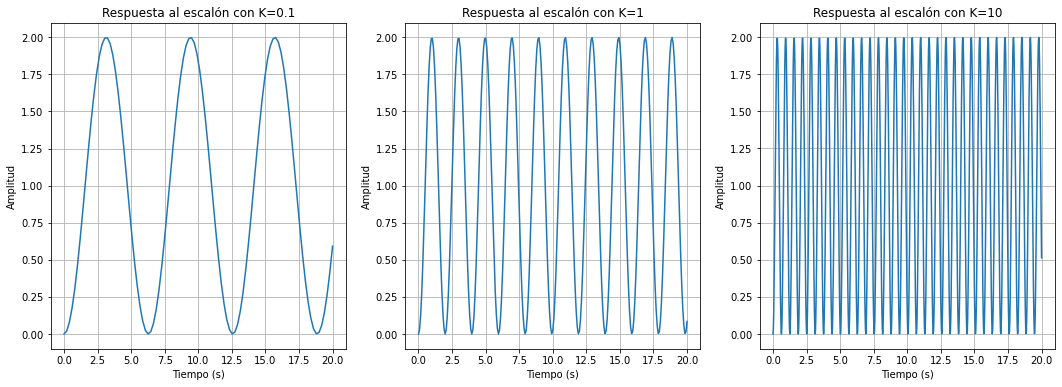

In [3]:
K_01=0.1
Fs_cl01=control.feedback(K_01*Fs_ol)
print('F_cl_01(s)=',Fs_cl01)

K_1=1
Fs_cl1=control.feedback(K_1*Fs_ol)
print('F_cl_1(s)=',Fs_cl1)

K_10=10
Fs_cl10=control.feedback(K_10*Fs_ol)
print('F_cl_10(s)=',Fs_cl10)



plt.figure(figsize=(18,6))


plt.subplot(131)
t, y = control.step_response(Fs_cl01, 20)
plt.plot(t,y)
plt.grid()
plt.title("Respuesta al escalón con K=0.1")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(132)
t, y = control.step_response(Fs_cl1, 20)
plt.plot(t,y)
plt.grid()
plt.title("Respuesta al escalón con K=1")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')

plt.subplot(133)
t, y = control.step_response(Fs_cl10, 20)
plt.plot(t,y)
plt.grid()
plt.title("Respuesta al escalón con K=10")
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()


Al hacer el sistema realimentado:

Cuando K=1, los polos estan en  $\pm\sqrt{10}$

Cuando K=0.1, los polos estan en  $\pm\sqrt{1}$

Cuando K=10, los polos estan en  $\pm\sqrt{100}$

Al estar en el eje imaginario, son oscilatorios con diferentes frecuencias.

### 7.Obtener la función de transferencia de lazo cerrado:

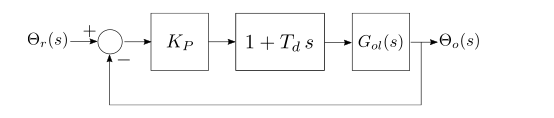

$\;\;$Al agregar un compensador del tipo derivativo, estamos modificando el lugar de raíces para que no esté ubicado sobre el eje imaginario, lo que causaba el comportamiento oscilatorio del sistema. De esta forma, podemos atenuar y hasta evitar que se produzcan oscilaciones si se calcula correctamente la constante de tiempo del compensador.

$\;\;$El resultado final de esto es que el balancín, o el dron, lleguen a su posición de equilibrio donde el ángulo $\theta = 0$

$$
K_p*(1+T_d*S)*G_{ol}(s)\\
K_p*(1+T_d*S)*\frac{10}{S²}\\
$$
$\;\;$Haciendo la realimentación del sistema:
$$
\frac{\frac{K_p*10*(1+T_d*S)}{S²}}{1+\frac{K_p*10*(1+T_d*S)}{S²}}\\
\frac{K_p*10(1+T_d*S)}{S²+10*K_p*T_d*S+10*K_p}\\
$$

### 8. Calcular las raíces del polinomio característico con $K_p = 1$ y $T_d$ como parámetro. Calcular el valor de $T_{d,crit}$. Decir qué tipo de respuesta al escalón se espera que tenga el sistema de lazo cerrado.

$\;\;$El polinomio característico queda de la forma:
$$
S²+10*T_d*S+10
$$

$\;\;$Aplicando Bhaskara, resulta en:
$$
\frac{-10T_d\pm\sqrt{(10T_d)²-4*10}}{2}
$$

$\;\;$Para obtener el $T_{d,crit}$ basta con hacer que el contenido de la raíz cuadrada sea nulo para que resulte en dos raíces reales e iguales, lo que es condición para que el sistema sea críticamente amortiguado.
$$
(10T_d)²-4*10=0\\
10²*T_d²=4*10\\
T_d²=\frac{40}{100}\\
T_{d,crit}=\sqrt{\frac{40}{100}}=\sqrt{\frac{2}{5}} \approx 0.6325
$$

### 9. Utilizando el paquete de control de python graficar el lugar de raíces del sistema con los valores de k que la función asigne por defecto para $T_d=0.1$, $T_d=T_{d,crit}$ y $T_d=2$.

Fs_ol(s)= 
s + 10
------
 s^2

Fs_ol(s)= 
6.325 s + 10
------------
    s^2

Fs_ol(s)= 
20 s + 10
---------
   s^2



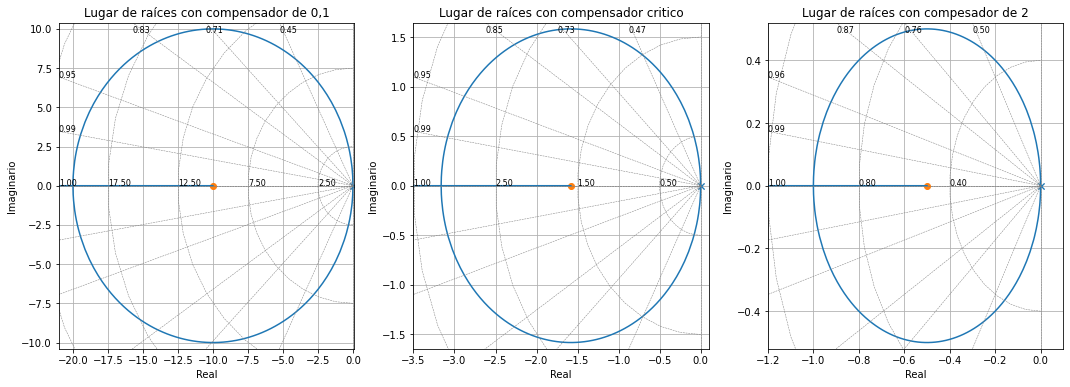

In [4]:
Td_01=0.1
num=np.array([10*Td_01,10])
den=np.array([1,0,0])
Fs_ol01=control.tf(num,den)
print('Fs_ol(s)=',Fs_ol01)

Td_cr=math.sqrt(2/5)
num=np.array([10*Td_cr,10])
den=np.array([1,0,0])
Fs_olPC=control.tf(num,den)
print('Fs_ol(s)=',Fs_olPC)

Td_2=2
num=np.array([10*Td_2,10])
den=np.array([1,0,0])
Fs_ol2=control.tf(num,den)
print('Fs_ol(s)=',Fs_ol2)

plt.figure(figsize=(18,6))

plt.subplot(131)
rlist,klist=control.root_locus(Fs_ol01,None,(-21,0.1))
plt.grid()
plt.title('Lugar de raíces con compensador de 0,1')
plt.ylabel('Imaginario')

plt.subplot(132)
rlist,klist=control.root_locus(Fs_olPC,None,(-3.5,0.1))
plt.grid()
plt.title('Lugar de raíces con compensador critico')
plt.ylabel('Imaginario')

plt.subplot(133)
rlist,klist=control.root_locus(Fs_ol2,None,(-1.2,0.1))
plt.grid()
plt.title('Lugar de raíces con compesador de 2')
plt.ylabel('Imaginario')

plt.show()



### 10. Utilizando la función feedback definir el modelo de lazo cerrado y aplicarle la función escalón unitario. Obtener las gráficas para valores de $K=0.1; K=1; K=10$ usando para cada caso los valores de $T_d$ del inciso anterior.

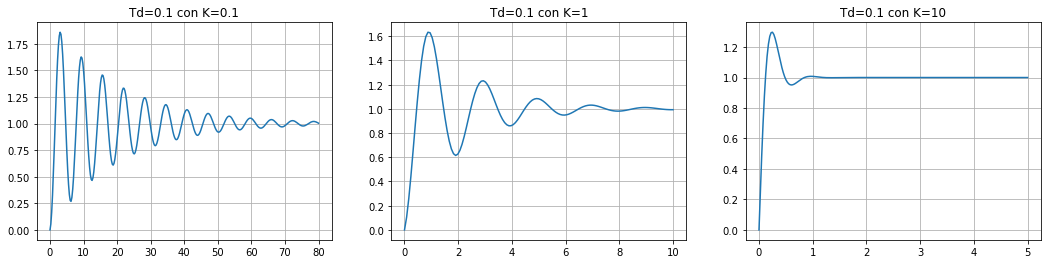

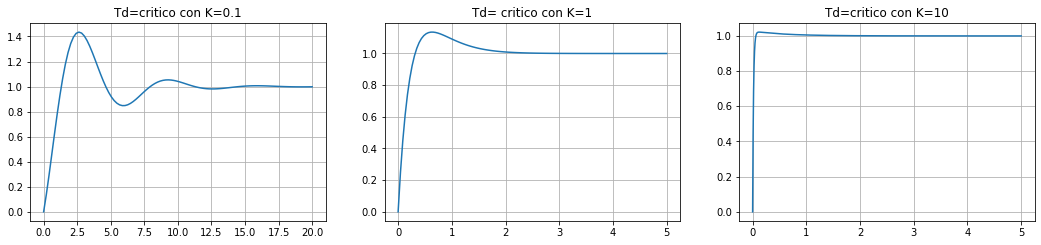

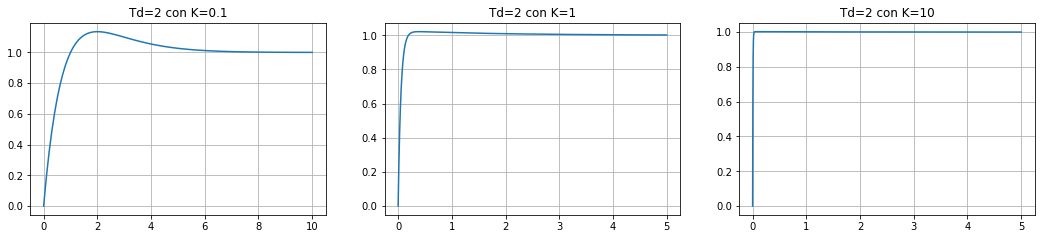

In [5]:
fs_clcrit_01=control.feedback(0.1*Fs_olPC)
fs_clcrit_1=control.feedback(1*Fs_olPC)
fs_clcrit_10=control.feedback(10*Fs_olPC)
fs_cl01_01=control.feedback(0.1*Fs_ol01)
fs_cl01_1=control.feedback(1*Fs_ol01)
fs_cl01_10=control.feedback(10*Fs_ol01)
fs_cl2_01=control.feedback(0.1*Fs_ol2)
fs_cl2_1=control.feedback(1*Fs_ol2)
fs_cl2_10=control.feedback(10*Fs_ol2)

plt.figure(figsize=(18,4))

plt.subplot(131)
t, y = control.step_response(fs_cl01_01, 80)
plt.plot(t,y)
plt.grid()
plt.title("Td=0.1 con K=0.1")


plt.subplot(132)
t, y = control.step_response(fs_cl01_1, 10)
plt.plot(t,y)
plt.grid()
plt.title("Td=0.1 con K=1")

plt.subplot(133)
t, y = control.step_response(fs_cl01_10, 5)
plt.plot(t,y)
plt.grid()
plt.title("Td=0.1 con K=10")
plt.show()


plt.figure(figsize=(18,8))
plt.subplot(231)
t, y = control.step_response(fs_clcrit_01, 20)
plt.plot(t,y)
plt.grid()
plt.title("Td=critico con K=0.1")


plt.subplot(232)
t, y = control.step_response(fs_clcrit_1, 5)
plt.plot(t,y)
plt.grid()
plt.title("Td= critico con K=1")

plt.subplot(233)
t, y = control.step_response(fs_clcrit_10, 5)
plt.plot(t,y)
plt.grid()
plt.title("Td=critico con K=10")


plt.figure(figsize=(18,12))
plt.subplot(331)
t, y = control.step_response(fs_cl2_01, 10)
plt.plot(t,y)
plt.grid()
plt.title("Td=2 con K=0.1")


plt.subplot(332)
t, y = control.step_response(fs_cl2_1, 5)
plt.plot(t,y)
plt.grid()
plt.title("Td=2 con K=1")

plt.subplot(333)
t, y = control.step_response(fs_cl2_10, 5)
plt.plot(t,y)
plt.grid()
plt.title("Td=2 con K=10")

plt.show()




 1. En el gráfico para Td=0.1 con K=0.1 a K=10, se puede observar que el sistema es subamortiguado pero a medida que aumenta el valor de K, el tiempo de establecimiento es menor. Lo que implica que se estabiliza más rápido. 
    * *Si lo llevamos a los drones, en este caso el drone se mantiene oscilando en el aire por más tiempo antes de estabilizarse.*
 2. En el gráfico para Td=crítico con K=0.1 a K=10, la amortiguación es mucho menor que en los anteriores gráficos. Además que a medida que aumenta K, se estabilizan en menor tiempo. 
    * *Este caso tiene la particularidad de que es el que más rápido llega a su posición de equilibrio, el dron oscila menos tiempo y se estabiliza más rapido.*
 3. En el gráfico para Td=2 con K de 0.1 a 10, si bien el sistema no oscila, tarda en llegar al valor final al aproximarse de forma lenta por encima del mismo.
    * *En este caso, el dron se estabiliza pero puede resultar con una leve inclinación que, dependiendo del tiempo, puede hacer que se desplace una distancia que no es despreciable.*


### Conclución.

$\;\;$ Al ser el sistema a lazo cerrado sin compensador, y exitarlo con una señal del tipo escalón, el sistema no se estabiliza y oscila. Haciendo imposible la operación de un VANT.

$\;\;$ Agregando un compensador derivativo al sistema, este se estabiliza y le permite alcanzar una respuesta estable. Logrando que el VANT pueda mantener un régimen de vuelo estacionario. A su vez, si variamos tanto $K_p$ como $T_d$, se ve como varia la respuesta al escalón. Pudiendo ser esta respuesta del tipo sub-amortiguado, críticamente-amortiguado o sobre-amortiguado.